In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags, kron, eye
from scipy.sparse.linalg import spsolve

In [13]:
# Generating a rectangular grid
Xpoint, Ypoint = 50, 50
domain_size = 1.0
Xspacing, Yspacing = domain_size / (Xpoint - 1), domain_size / (Ypoint - 1)
# Xspacing = domain_size / (Xpoint - 1)
# Yspacing = domain_size / (Ypoint - 1)
x, y = np.linspace(0, domain_size, Xpoint), np.linspace(0, domain_size, Ypoint)
# y = np.linspace(0, domain_size, Ypoint)
X, Y = np.meshgrid(x, y, indexing="ij")
print(f'x.shape={x.shape} - y.shape={y.shape}')
print(f'X.shape={X.shape} - Y.shape={Y.shape}')


x.shape=(50,) - y.shape=(50,)
X.shape=(50, 50) - Y.shape=(50, 50)


In [14]:
# Defining the exact solution and f source term
u_exact = np.sin(np.pi * X)**2 * np.sin(np.pi * Y)**2
f_source =  -(2 * np.pi**2 * (np.cos(2 * np.pi * X) * np.sin(np.pi * Y)**2 + np.cos(2 * np.pi * Y) * np.sin(np.pi * X)**2))
# constructing the discrete Laplacian operator
N = (Xpoint - 2) * (Ypoint - 2)
ex = np.ones(Xpoint - 2)
ey = np.ones(Ypoint - 2)
Tridiagonal_matrix_X = spdiags([ex, -2 * ex, ex], [-1, 0, 1], Xpoint - 2, Xpoint - 2) / Xspacing**2
Tridiagonal_matrix_Y = spdiags([ey, -2 * ey, ey], [-1, 0, 1], Ypoint - 2, Ypoint - 2) / Yspacing**2
Kronecker_product = kron(eye(Ypoint - 2), Tridiagonal_matrix_X) + kron(Tridiagonal_matrix_Y, eye(Xpoint - 2))
#Validating my outputs
print(f'{Tridiagonal_matrix_X.shape} - {Tridiagonal_matrix_Y.shape}')
print(Kronecker_product.shape)
print(u_exact.shape)


(48, 48) - (48, 48)
(2304, 2304)
(50, 50)


In [15]:
# Flatten the f source term and appdomain_size boundary conditions
f_interior = f_source[1:-1, 1:-1].flatten()
b = np.zeros_like(f_interior)
f_total = f_interior + b

# Solving the linear system
u_interior = spsolve(Kronecker_product, f_total)
u_numerical = np.zeros_like(X)
u_numerical[1:-1, 1:-1] = np.reshape(u_interior, (Xpoint - 2, Ypoint - 2))

# Validating the Exact and  Numerical result
error = np.max(np.abs(u_exact - u_numerical))
print(f"Maximum error: {error:.5e}")
print(f_interior.shape)
print(u_numerical.shape)
print(b.shape)

Maximum error: 1.99726e+00
(2304,)
(50, 50)
(2304,)


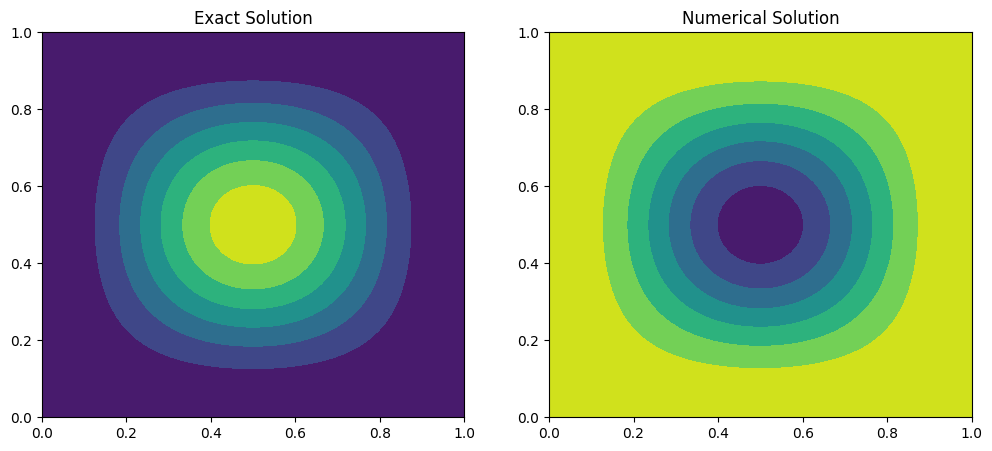

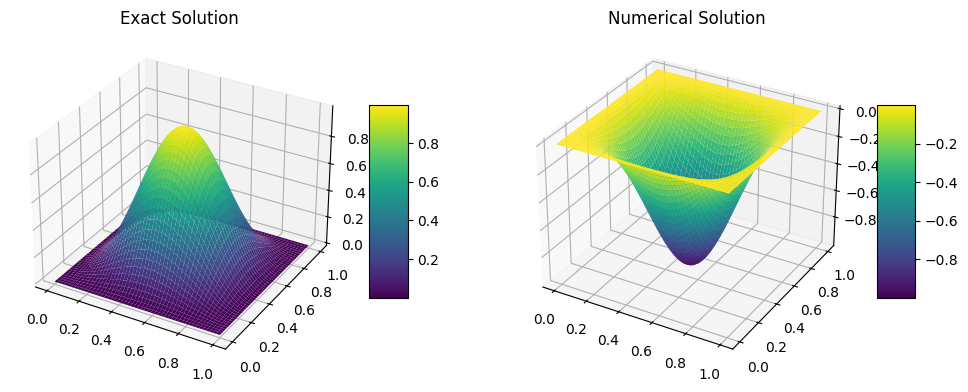

In [16]:
# Plotting the exact and numerical solutions in 2d projection
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].contourf(X, Y, u_exact, cmap='viridis')
axes[0].set_title("Exact Solution")
axes[1].contourf(X, Y, u_numerical, cmap='viridis')
axes[1].set_title("Numerical Solution")
plt.show()

from mpl_toolkits.mplot3d import Axes3D

# Plotting the exact and numerical solutions in 3d projection
fig = plt.figure(figsize=(12, 5))

# Plot for exact solution
ax1 = fig.add_subplot(121, projection='3d')
surf1 = ax1.plot_surface(X, Y, u_exact, cmap='viridis', edgecolor='none')
ax1.set_title("Exact Solution")
fig.colorbar(surf1, ax=ax1, shrink=0.5, aspect=5)

# Plot for numerical solution
ax2 = fig.add_subplot(122, projection='3d')
surf2 = ax2.plot_surface(X, Y, u_numerical, cmap='viridis', edgecolor='none')
ax2.set_title("Numerical Solution")
fig.colorbar(surf2, ax=ax2, shrink=0.5, aspect=5)

plt.show()

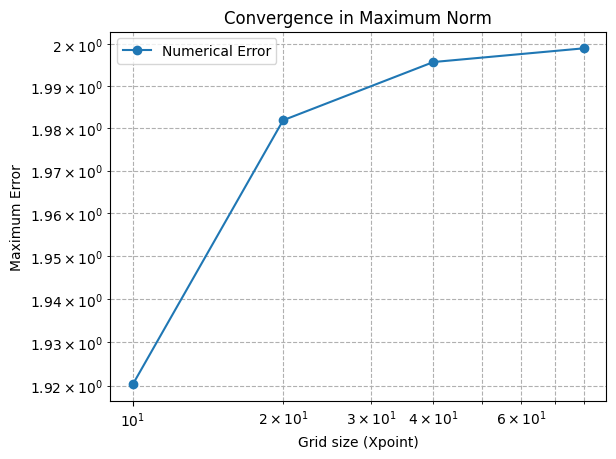

[1.9203561993703464, 1.9818543206287993, 1.9956786304187821, 1.9989459949213921]


In [18]:
# Plotting the convergence
errors = []
grid_sizes = [10, 20, 40, 80]
for n in grid_sizes:
    Xspacing = domain_size / (n - 1)
    Yspacing = domain_size / (n - 1)
    x = np.linspace(0, domain_size, n)
    y = np.linspace(0, domain_size, n)
    X, Y = np.meshgrid(x, y, indexing="ij")
    f = -(2 * np.pi**2 * (np.cos(2 * np.pi * X) * np.sin(np.pi * Y)**2 + np.cos(2 * np.pi * Y) * np.sin(np.pi * X)**2))
    Xpoint, Ypoint = n, n
    ex = np.ones(Xpoint - 2)
    ey = np.ones(Ypoint - 2)
    Tridiagonal_matrix_X = spdiags([ex, -2 * ex, ex], [-1, 0, 1], Xpoint - 2, Xpoint - 2) / Xspacing**2
    Tridiagonal_matrix_Y = spdiags([ey, -2 * ey, ey], [-1, 0, 1], Ypoint - 2, Ypoint - 2) / Yspacing**2
    Kronecker_product = kron(eye(Ypoint - 2), Tridiagonal_matrix_X) + kron(Tridiagonal_matrix_Y, eye(Xpoint - 2))

    f_interior = f[1:-1, 1:-1].flatten()
    b = np.zeros_like(f_interior)
    f_total = f_interior + b

    u_interior = spsolve(Kronecker_product, f_total)
    u_numerical = np.zeros_like(X)
    u_numerical[1:-1, 1:-1] = np.reshape(u_interior, (Xpoint - 2, Ypoint - 2))

    u_exact = np.sin(np.pi * X)**2 * np.sin(np.pi * Y)**2
    error = np.max(np.abs(u_exact - u_numerical))
    errors.append(error)

plt.loglog(grid_sizes, errors, '-o', label='Numerical Error')
plt.title("Convergence in Maximum Norm")
plt.xlabel("Grid size (Xpoint)")
plt.ylabel("Maximum Error")
plt.grid(True, which="both", linestyle="--")
plt.legend()
plt.show()
print(errors)

# Part 2a: Direct methods with sparse representation

In [19]:
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import splu

In [20]:
# Sparse matrix representation
Kronecker_product_sparse = csc_matrix(Kronecker_product)
solver = splu(Kronecker_product_sparse)  # LU decomposition for sparse matrices
u_interior_sparse = solver.solve(f_total)

# Numerical solution
u_numerical_sparse = np.zeros_like(X)
u_numerical_sparse[1:-1, 1:-1] = np.reshape(u_interior_sparse, (Xpoint - 2, Ypoint - 2))

# Validate sparse solution
error_sparse = np.max(np.abs(u_exact - u_numerical_sparse))
print(f"Maximum error with sparse solver: {error_sparse:.5e}")

Maximum error with sparse solver: 1.99895e+00


In [ ]:
# Compare computational time
import time

def time_solver(solver_func, *args):
    start = time.time()
    solver_func(*args)
    return time.time() - start

# Timing dense solver
def solve_dense():
    spsolve(Kronecker_product, f_total)

time_dense = time_solver(solve_dense)

# Timing sparse solver
def solve_sparse():
    solver.solve(f_total)

time_sparse = time_solver(solve_sparse)

print(f"Dense solver time: {time_dense:.5f} seconds")
print(f"Sparse solver time: {time_sparse:.5f} seconds")

Dense solver time: 0.07087 seconds
Sparse solver time: 0.00221 seconds


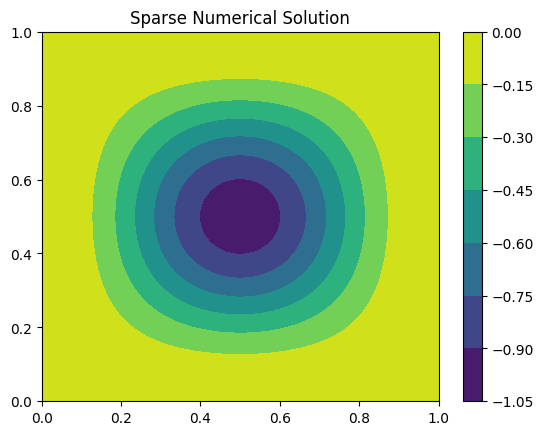

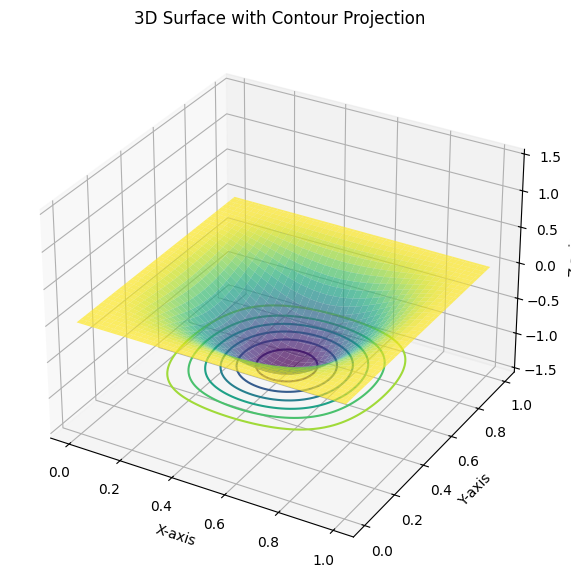

In [32]:
# Plot numerical solution from sparse solver
plt.contourf(X, Y, u_numerical_sparse, cmap='viridis')
plt.title("Sparse Numerical Solution")
plt.colorbar()
plt.show()

# Create a figure for the 3D plot
fig = plt.figure(figsize=(10, 7))

# Add a 3D subplot
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, u_numerical_sparse, cmap='viridis', alpha=0.7)

# Add contour lines projected onto the x-y plane
ax.contour(X, Y, u_numerical_sparse, zdir='u_numerical_sparse', offset=-1, cmap='viridis')

# Add labels and a title
ax.set_title("3D Surface with Contour Projection")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

# Set z-axis limits
ax.set_zlim(-1.5, 1.5)

# Show the plot
plt.show()


# Part 2b: Iterative methods

In [26]:
# Jacobi Method
def jacobi(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    D = spdiags(Kronecker_product.diagonal(), 0, Kronecker_product.shape[0], Kronecker_product.shape[1])
    R = Kronecker_product - D
    x = x0
    for i in range(max_iter):
        x_new = (b - R @ x) / D.diagonal()
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, i
        x = x_new
    return x, max_iter

# Gauss-Seidel Method
def gauss_seidel(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    x = x0
    n = Kronecker_product.shape[0]
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = Kronecker_product[i, :i] @ x_new[:i]
            sum2 = Kronecker_product[i, i + 1:] @ x[i + 1:]
            x_new[i] = (b[i] - sum1 - sum2) / Kronecker_product[i, i]
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iter

# SOR Method
def sor(Kronecker_product, b, x0, omega, tol=1e-8, max_iter=10000):
    x = x0
    n = Kronecker_product.shape[0]
    for k in range(max_iter):
        x_new = np.copy(x)
        for i in range(n):
            sum1 = Kronecker_product[i, :i] @ x_new[:i]
            sum2 = Kronecker_product[i, i + 1:] @ x[i + 1:]
            x_new[i] = (1 - omega) * x[i] + omega * (b[i] - sum1 - sum2) / Kronecker_product[i, i]
        if np.linalg.norm(x_new - x, np.inf) < tol:
            return x_new, k
        x = x_new
    return x, max_iter

In [27]:
# Test iterative methods
x0 = np.zeros_like(f_total)

# Jacobi
x_jacobi, iter_jacobi = jacobi(Kronecker_product_sparse, f_total, x0)
print(f"Jacobi converged in {iter_jacobi} iterations")

# Gauss-Seidel
x_gs, iter_gs = gauss_seidel(Kronecker_product_sparse.toarray(), f_total, x0)
print(f"Gauss-Seidel converged in {iter_gs} iterations")

# SOR
omega = 1.5  # Relaxation parameter
x_sor, iter_sor = sor(Kronecker_product_sparse.toarray(), f_total, x0, omega)
print(f"SOR converged in {iter_sor} iterations with omega = {omega}")

Jacobi converged in 10000 iterations
Gauss-Seidel converged in 7362 iterations
SOR converged in 2679 iterations with omega = 1.5


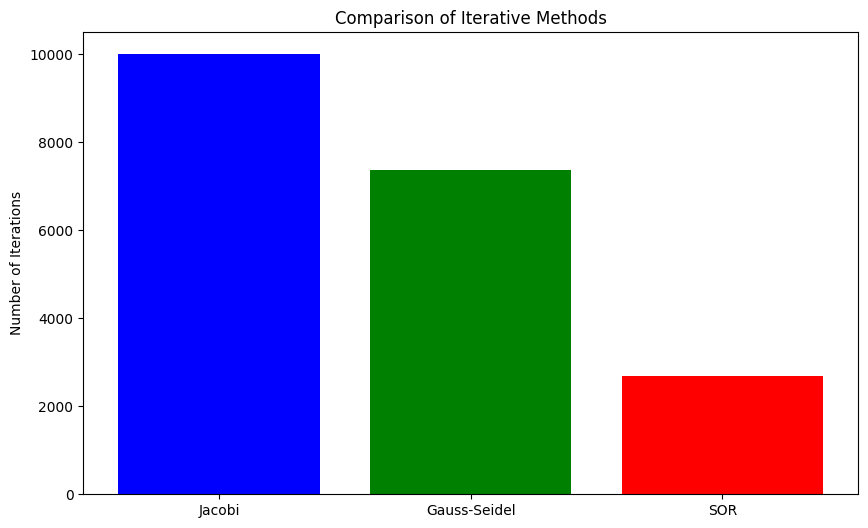

In [28]:
# Residual plot
plt.figure(figsize=(10, 6))
methods = ["Jacobi", "Gauss-Seidel", "SOR"]
iterations = [iter_jacobi, iter_gs, iter_sor]
plt.bar(methods, iterations, color=['blue', 'green', 'red'])
plt.ylabel("Number of Iterations")
plt.title("Comparison of Iterative Methods")
plt.show()

# Part 4: Extensions

Conjugate Gradient converged in 160 iterations


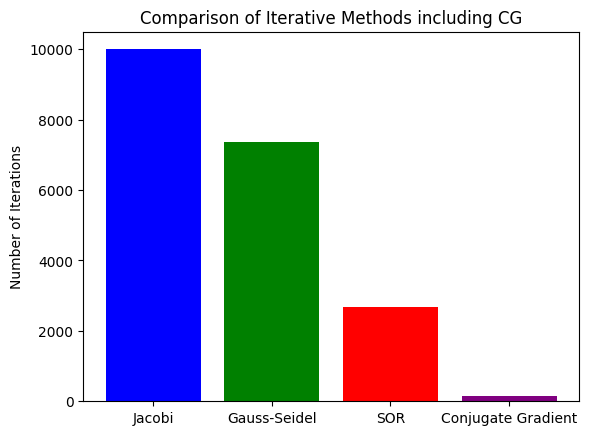

In [29]:
# Implementing Conjugate Gradient Method
def conjugate_gradient(Kronecker_product, b, x0, tol=1e-8, max_iter=10000):
    x = x0
    r = b - Kronecker_product @ x
    p = r
    rsold = r @ r

    for i in range(max_iter):
        Ap = Kronecker_product @ p
        alpha = rsold / (p @ Ap)
        x = x + alpha * p
        r = r - alpha * Ap
        rsnew = r @ r
        if np.sqrt(rsnew) < tol:
            return x, i
        p = r + (rsnew / rsold) * p
        rsold = rsnew
    return x, max_iter

# Test Conjugate Gradient Method
x_cg, iter_cg = conjugate_gradient(Kronecker_product_sparse, f_total, x0)
print(f"Conjugate Gradient converged in {iter_cg} iterations")

# Compare Residual Decay for CG vs Others
methods = ["Jacobi", "Gauss-Seidel", "SOR", "Conjugate Gradient"]
iterations = [iter_jacobi, iter_gs, iter_sor, iter_cg]
plt.bar(methods, iterations, color=['blue', 'green', 'red', 'purple'])
plt.ylabel("Number of Iterations")
plt.title("Comparison of Iterative Methods including CG")
plt.show()
